<a href="https://colab.research.google.com/github/voquangtuong/AAA_drought_prediction/blob/main/good_bad_zones_comparion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import sys
!{sys.executable} -m pip install seasonal --q
!{sys.executable} -m pip install statsmodels --q

In [ ]:
import seaborn as sn
from datetime import date
import matplotlib.dates as mdates
from seasonal import fit_seasons, adjust_seasons
import seasonal
import statsmodels.api as sm

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import os
os.chdir('/content/drive/MyDrive')

In [ ]:
# n_arr=np.empty((12,269,269,269))
# n_arr.shape

In [ ]:
# for n_month in range(12):
#  df=pd.read_csv('NDI1/tabs'+'/'+str(n_month+1)+'.csv')
#  n_arr[n_month,:,:,:]=n_month
# print(n_arr)
# df.zones.values

   

In [ ]:
# arr_test=np.arange(6) + np.arange(0, 51, 10)[:, np.newaxis]
# arr_test.shape

In [ ]:
values_pred,values_obs,values_rmse=[],[],[]
for n_month in range(12):
  df=pd.read_csv('NDI1/tabs2015'+'/'+str(n_month+1)+'.csv')
  zone_names=[]
  for zone in range(269):
    zone_names.append(df.zones[zone])
    values_pred.append(df.pred[zone])
    values_obs.append(df.obs[zone])
    values_rmse.append(df.rmse[zone])
  

In [ ]:
#ket qua phai co dang :
# zone_id: 0-269
# n_month: 0-12
# values_pred =269*12
# # values_obs =269*12


In [ ]:
arr_pred=np.array(values_pred).reshape(12,269)
# arr_pred.shape
arr_obs=np.array(values_obs).reshape(12,269)
# arr_obs.shape
arr_rmse=np.array(values_rmse).reshape(12,269)
# arr_rmse.shape

In [ ]:
# find the maximum and minimum rmse index
n_zone_min=0
initial_value_zone_min=np.mean(arr_rmse[:,0])
for zone in range(269):
  if np.mean(arr_rmse[:,zone])<=initial_value_zone_min:
    initial_value_zone_min= np.mean(arr_rmse[:,zone])

    n_zone_min=zone
print(n_zone_min,initial_value_zone_min)

# find the maximum and minimum rmse index
n_zone_max=0
initial_value_zone_max=np.mean(arr_rmse[:,0])
for zone in range(269):
  if np.mean(arr_rmse[:,zone])>=initial_value_zone_max:
    initial_value_zone_max=np.mean(arr_rmse[:,zone])

    n_zone_max=zone
print(n_zone_max,initial_value_zone_max)



11 0.046971217692516505
168 0.725552364139047


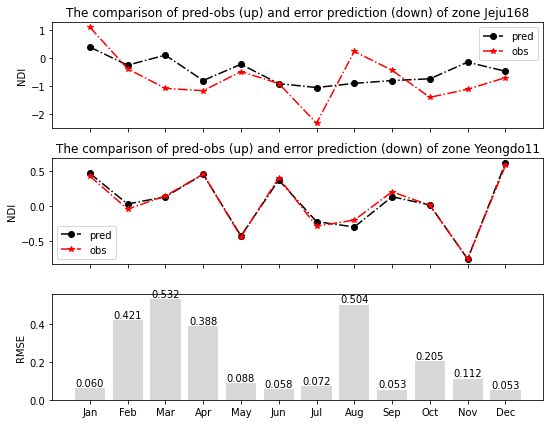

In [ ]:
# Ve b1 hinh chua 3 cot bieu do
# kiem tra zone 268 bad
months_names=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
# n_zone_max=268
fig,axs=plt.subplots(3,1,sharex=True,figsize=(8,6))
# plt.subplot(3,1,1)
axs[0].plot(months_names,arr_pred[:,n_zone_max],"ko-.")
axs[0].plot(months_names,arr_obs[:,n_zone_max],"r*-.")
axs[0].legend(['pred','obs'])
axs[0].set_ylabel('NDI')
axs[0].set_title('The comparison of pred-obs (up) and error prediction (down) of zone '+zone_names[n_zone_max])

# n_zone_min=268
# fig,axs=plt.subplots(3,1,sharex=True,figsize=(8,6))
# plt.subplot(3,1,2)
axs[1].plot(months_names,arr_pred[:,n_zone_min],"ko-.")
axs[1].plot(months_names,arr_obs[:,n_zone_min],"r*-.")
axs[1].legend(['pred','obs'])
axs[1].set_ylabel('NDI')
axs[1].set_title('The comparison of pred-obs (up) and error prediction (down) of zone '+zone_names[n_zone_min])
# plt.close(fig)
# fig=plt.Figure()
# plt.subplot(3,1,3)
ax=axs[2].bar(months_names,arr_rmse[:,zone],fill=True,color='gray',alpha=0.3)
axs[2].set_ylabel('RMSE')
rects = ax.patches
# Make some labels.
labels = ["%0.3f" % i for i in np.array(list(arr_rmse[:,zone]))]


for rect, label in zip(rects, labels):
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2, height + 0, label,
            ha='center', va='bottom')
plt.tight_layout()
plt.savefig('NDI1/figs2015/'+zone_names[zone]+'compared3.png')
plt.show()
plt.close(fig)


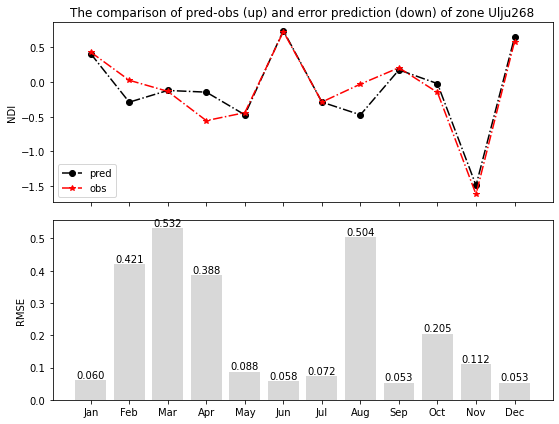

In [ ]:
# kiem tra zone 268 bad
months_names=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
n_zone=268
fig,axs=plt.subplots(2,1,sharex=True,figsize=(8,6))
axs[0].plot(months_names,arr_pred[:,n_zone],"ko-.")
axs[0].plot(months_names,arr_obs[:,n_zone],"r*-.")
axs[0].legend(['pred','obs'])
axs[0].set_ylabel('NDI')
axs[0].set_title('The comparison of pred-obs (up) and error prediction (down) of zone '+zone_names[n_zone])
# plt.close(fig)
# fig=plt.Figure()

ax=axs[1].bar(months_names,arr_rmse[:,zone],fill=True,color='gray',alpha=0.3)
axs[1].set_ylabel('RMSE')
rects = ax.patches
# Make some labels.
labels = ["%0.3f" % i for i in np.array(list(arr_rmse[:,zone]))]


for rect, label in zip(rects, labels):
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height + 0, label,
            ha='center', va='bottom')
plt.tight_layout()
plt.savefig('NDI1/figs2015/'+zone_names[zone]+'compared.png')
plt.show()
plt.close(fig)

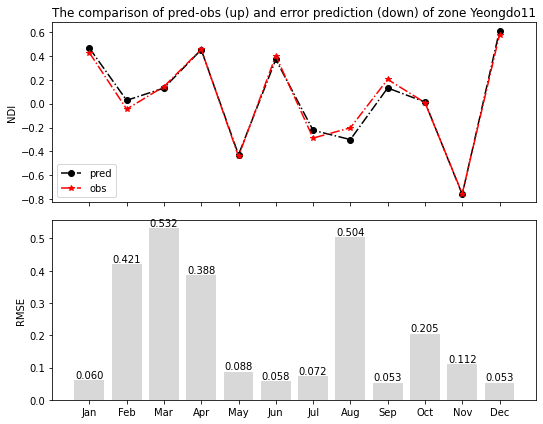

In [ ]:
# kiem tra zone 11 good
months_names=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
n_zone=11
fig,axs=plt.subplots(2,1,sharex=True,figsize=(8,6))
axs[0].plot(months_names,arr_pred[:,n_zone],"ko-.")
axs[0].plot(months_names,arr_obs[:,n_zone],"r*-.")
axs[0].legend(['pred','obs'])
axs[0].set_ylabel('NDI')
axs[0].set_title('The comparison of pred-obs (up) and error prediction (down) of zone '+zone_names[n_zone])
# plt.close(fig)
# fig=plt.Figure()

ax=axs[1].bar(months_names,arr_rmse[:,zone],fill=True,color='gray',alpha=0.3)
axs[1].set_ylabel('RMSE')
rects = ax.patches
# Make some labels.
labels = ["%0.3f" % i for i in np.array(list(arr_rmse[:,zone]))]


for rect, label in zip(rects, labels):
    height = rect.get_height()
    axs[1].text(rect.get_x() + rect.get_width() / 2, height + 0, label,
            ha='center', va='bottom')
plt.tight_layout()
plt.savefig('NDI1/figs2015/'+zone_names[zone]+'compared.png')
plt.show()
plt.close(fig)

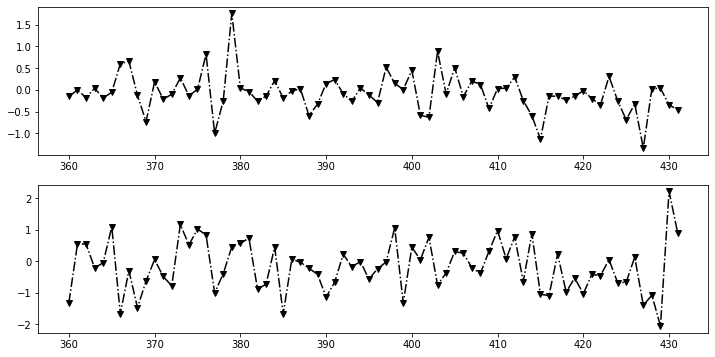

In [ ]:
# Kiểm tra dữ liệu gốc
df_NDI1mean_obs=pd.read_csv('NDI1/decomposition/NDI1_mean_observed.csv')
fig,axes=plt.subplots(2,1,figsize=(12,6))
plt.subplot(2,1,1)
df_NDI1mean_obs.iloc[-72:,11].plot.line(style=['kv-.'])
plt.subplot(2,1,2)
df_NDI1mean_obs.iloc[-72:,268].plot.line(style=['kv-.'])


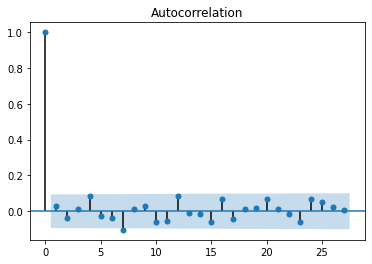

In [ ]:
# from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
# series = read_csv('temperature.txt', header=0, index_col=0)
# series0 = read_csv('percentile_101.csv', header=0, index_col=0)
# series=series0.iloc[:,0]
df=df_NDI1mean_obs.copy()
fig=plt.Figure(figsize=(12,8))
series=df.iloc[0:,11]
# plt.subplot(3,1,1)
plot_acf(series)
# pyplot.show()
plt.show()
plt.close(fig)

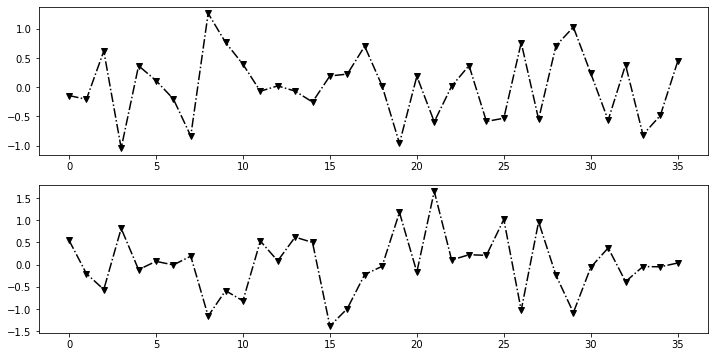

In [ ]:
df_NDI1mean_jan=pd.read_csv('NDI1/monthly_nocor/month3.csv')
# Kiểm tra dữ liệu gốc
# df_NDI1mean_jan
fig,axes=plt.subplots(2,1,figsize=(12,6))
plt.subplot(2,1,1)
df_NDI1mean_jan.iloc[:,11].plot.line(style=['kv-.'])
plt.subplot(2,1,2)
df_NDI1mean_jan.iloc[:,268].plot.line(style=['kv-.'])

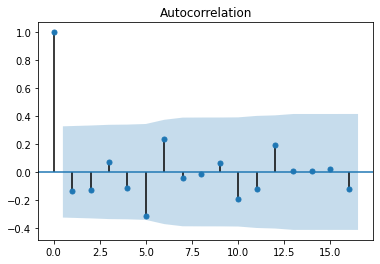

In [ ]:
# from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
# series = read_csv('temperature.txt', header=0, index_col=0)
# series0 = read_csv('percentile_101.csv', header=0, index_col=0)
# series=series0.iloc[:,0]
df=df_NDI1mean_jan.copy()
fig=plt.Figure(figsize=(12,8))
series=df.iloc[0:,11]
# plt.subplot(3,1,1)
plot_acf(series)
# pyplot.show()
plt.show()
plt.close(fig)

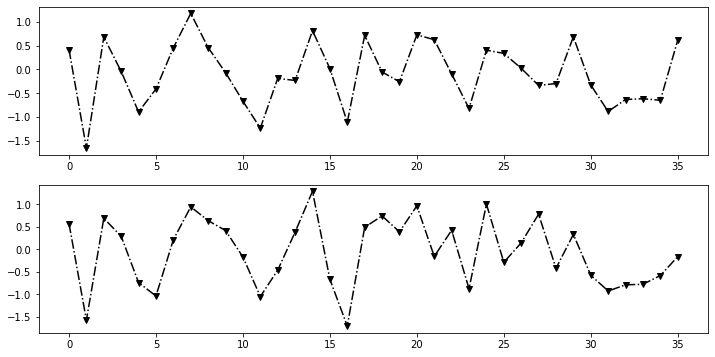

In [ ]:
df_NDI1mean_jan=pd.read_csv('NDI1/monthly_nocor/month12.csv')
# Kiểm tra dữ liệu gốc
# df_NDI1mean_jan
fig,axes=plt.subplots(2,1,figsize=(12,6))
plt.subplot(2,1,1)
df_NDI1mean_jan.iloc[:,11].plot.line(style=['kv-.'])
plt.subplot(2,1,2)
df_NDI1mean_jan.iloc[:,268].plot.line(style=['kv-.'])

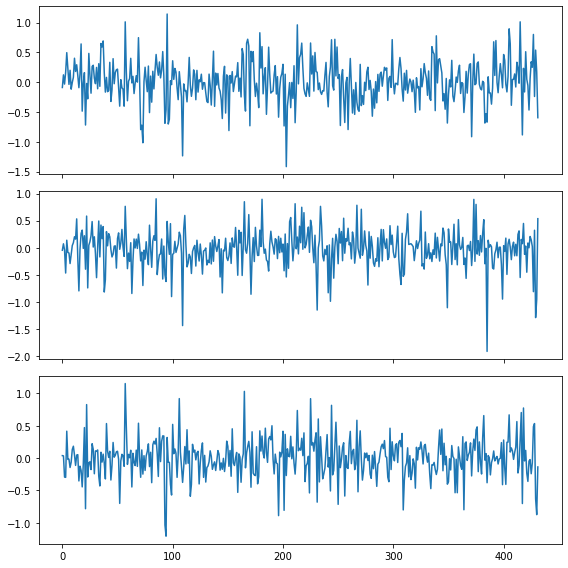

In [ ]:
plt.figure(0,figsize=(8,8))

plt.subplot(3,1,1)
df=df_NDI1mean_obs.copy()
df.iloc[:,1].plot() #no need to specify for first axis
plt.subplot(3,1,2)
df.iloc[:,2].plot(ax=plt.gca())
plt.subplot(3,1,3)
df.iloc[:,3].plot(ax=plt.gca(),sharex=True)
plt.tight_layout()
plt.show()
plt.close(fig)

# P1. TEST DATA

In [ ]:
df_NDI_min_obs0=pd.read_csv('NDI1/decomposition-min/NDI1_min_observed.csv')
df_NDI_min_obs=df_NDI_min_obs0.iloc[:-12,:] # lay tu nam 2015 do lai
print(df_NDI_min_obs)

df_NDI_min_sea0=pd.read_csv('NDI1/decomposition-min/NDI1_min_seasonal.csv')
df_NDI_min_sea=df_NDI_min_sea0.iloc[:-12,:] # lay tu nam 2015 do lai
print(df_NDI_min_sea)

df_NDI_min_trend0=pd.read_csv('NDI1/decomposition-min/NDI1_min_trend.csv')
df_NDI_min_trend=df_NDI_min_trend0.iloc[:-12,:] # lay tu nam 2015 do lai
print(df_NDI_min_trend)

     Unnamed: 0  Andong106   Ansan75  ...  Yongin105  Yongsan263  Yuseong53
0    1981-01-01  -0.226153 -0.127946  ...  -0.311494   -0.156887  -0.309297
1    1981-02-01   0.080731  0.049977  ...   0.044439    0.027924  -0.386103
2    1981-03-01  -0.431459 -0.085562  ...  -0.649506   -0.325247   0.386579
3    1981-04-01  -0.284231 -0.497449  ...  -0.594521   -0.336977   0.208394
4    1981-05-01   0.110556  0.080125  ...   0.243021    0.013698   0.574250
..          ...        ...       ...  ...        ...         ...        ...
415  2015-08-01   0.628996 -0.806476  ...   0.230720   -1.134084  -1.921178
416  2015-09-01  -1.163916 -0.270819  ...  -1.097535   -1.170412   0.277617
417  2015-10-01  -1.402671 -0.001728  ...  -1.302637    0.206149   0.014489
418  2015-11-01   0.064731  0.193119  ...  -0.290921   -1.092736   1.500073
419  2015-12-01  -0.535291 -0.337167  ...  -0.724450   -0.581339  -0.615428

[420 rows x 270 columns]
     Unnamed: 0  Andong106   Ansan75  ...  Yongin105  Yongsan2

In [ ]:
df_residal=df_NDI_min_obs.iloc[:,1:]-df_NDI_min_sea.iloc[:,1:]-df_NDI_min_trend.iloc[:,1:]


In [ ]:
# load tu du lieu mo hinh 
df1=pd.read_csv("/content/drive/MyDrive/NDI1/monthly_cor_all_min/"+zone_names[n_zone_min]+"month1.csv")
df2=pd.read_csv("/content/drive/MyDrive/NDI1/monthly_cor_all_min/"+zone_names[n_zone_max]+"month1.csv")
data=[df1.values,df2.values]
colnames=[zone_names[n_zone_max],zone_names[n_zone_min]]
print(colnames)
df1.shape[0]
df2.shape[0]

['Jeju168', 'Yeongdo11']


36

In [ ]:
df1

,NDI
0,-0.349004
1,-0.478661
2,-0.069127
3,-1.576054
4,-0.758377
...,...
715,0.340208
716,0.510631
717,-0.316342
718,0.428153


In [ ]:

model1=sm.tsa.seasonal_decompose(df1.values, model='additive', filt=None, freq=12, two_sided=True, extrapolate_trend=0)
model2=sm.tsa.seasonal_decompose(df2.values, model='additive', filt=None, freq=12, two_sided=True, extrapolate_trend=0)
model1.resid
model2.resid

array([        nan,         nan,         nan,         nan,         nan,
               nan,  0.0482643 , -1.04377779,  0.03091743,  0.45600756,
        0.43391881,  0.8165988 ,  0.3750818 , -0.37828265, -0.29607915,
       -0.64643139, -0.4607592 ,  0.64652259,  0.00739864,  1.09944072,
        0.02474551, -0.40034463, -0.37825588, -0.76093586, -0.31941886,
        0.43394559,  0.35174209,  0.70209433,  0.51642213, -0.59085965,
               nan,         nan,         nan,         nan,         nan,
               nan])

In [ ]:
# remove nan trong array
x = model1.resid[~np.isnan(model1.resid)]
y = model2.resid[~np.isnan(model2.resid)]
data1=[x,y]

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


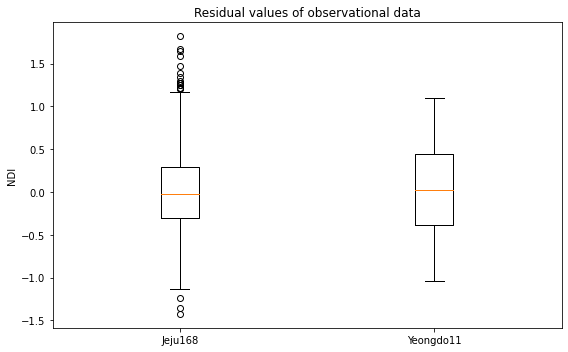

In [ ]:
fig,axes=plt.subplots(figsize=(8,5))
plt.boxplot(data1,labels=colnames)

plt.ylabel('NDI')
plt.title("Residual values of observational data")
plt.tight_layout()
plt.savefig('NDI1/figs2015/'+zone_names[zone]+'comparedboxresidual.png')


In [ ]:
# cac loai test trong machine learning
# https://machinelearningmastery.com/statistical-hypothesis-tests-in-python-cheat-sheet/

In [ ]:
# kiem tra mo hinh stationary
# Augmented Dickey-Fuller Unit Root Test
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
# data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
data=model1.observed #
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=-7.035, p=0.000
Probably Stationary


In [ ]:
# kiem tra mo hinh stationary
# Augmented Dickey-Fuller Unit Root Test
# Example of the Augmented Dickey-Fuller unit root test
from statsmodels.tsa.stattools import adfuller
# data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
data=model2.observed #
stat, p, lags, obs, crit, t = adfuller(data)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably not Stationary')
else:
	print('Probably Stationary')

stat=1.229, p=0.996
Probably not Stationary
